<a href="https://colab.research.google.com/github/yylmax/MachineLearning/blob/main/ALEXNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import keras.utils
from keras import utils as np_utils
import seaborn as sns
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras as ks

from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
sns.set()
print('tensorflow version : ', tf.__version__)

tensorflow version :  2.8.0


In [ ]:
df = pd.read_csv('../content/pokemon.csv')
df.shape
df.head(10)
df1 = df.sort_values(by=['Name']).reset_index(drop=True)
df1.head(10)

,Name,Type1,Type2
0,abomasnow,Grass,Ice
1,abra,Psychic,NaN
2,absol,Dark,NaN
3,accelgor,Bug,NaN
4,aegislash-blade,Steel,Ghost
5,aerodactyl,Rock,Flying
6,aggron,Steel,Rock
7,aipom,Normal,NaN
8,alakazam,Psychic,NaN
9,alomomola,Water,NaN


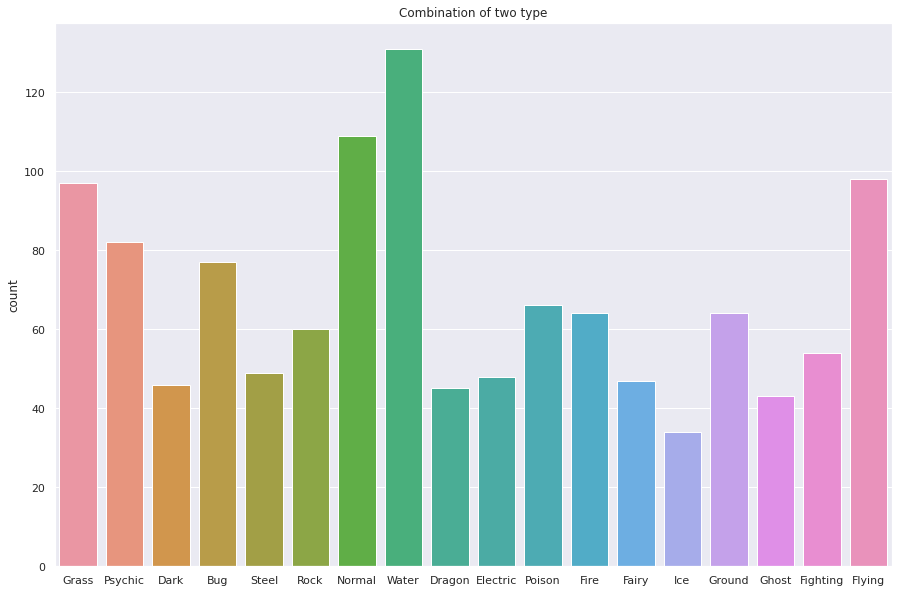

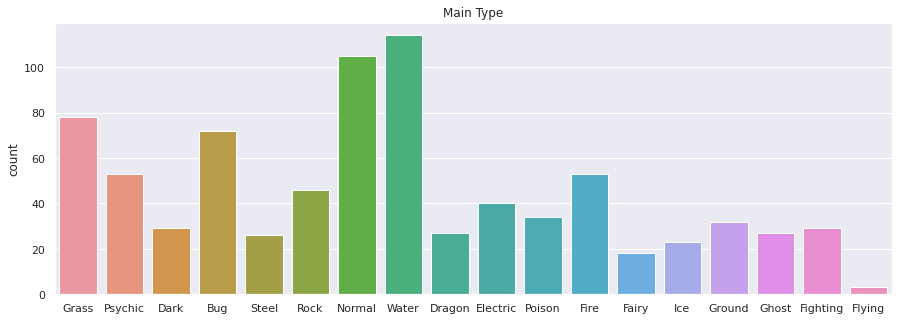

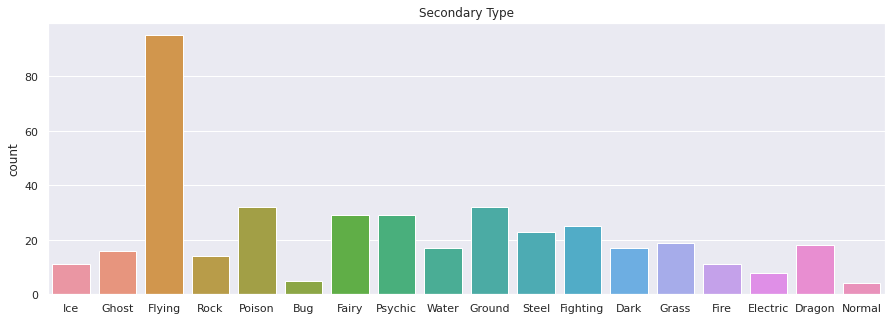

In [ ]:
typeList = df1['Type1'].tolist() + df1['Type2'].tolist()
plt.figure(figsize=(15,10))
sns.countplot(x=typeList)
plt.title("Combination of two type")
plt.show()
typeList1 = df1['Type1'].tolist()
plt.figure(figsize=(15,5))
sns.countplot(x=typeList1)
plt.title("Main Type")
plt.show()
typeList2 = df1['Type2'].tolist()
plt.figure(figsize=(15,5))
sns.countplot(x=typeList2)
plt.title("Secondary Type")
plt.show()

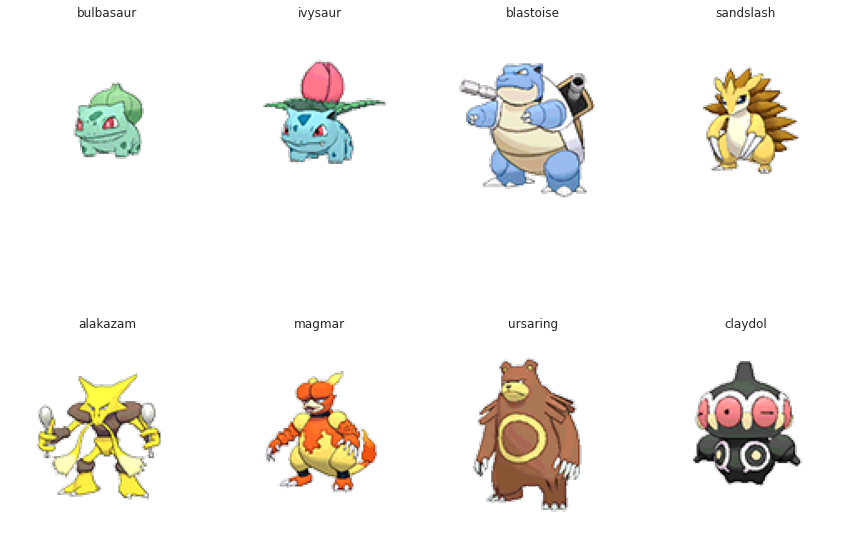

In [ ]:
import matplotlib.image as mpimg
path = '../content/content1/'
fig,((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(12, 10))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
for i in range(8):
    img = mpimg.imread(path+df['Name'][i**3]+'.png')
    ax[i].imshow(img)
    ax[i].set_title(df['Name'][i**3])
    ax[i].axis('off')
plt.tight_layout()
plt.show()
import os
path='../content/content1/'
img_name = sorted(os.listdir('../content/content1/'))
img_paths = []
for i in img_name:
    img_paths.append(path + i)
df1['filepath'] = img_paths

poke_type = []
code = []

for i in range(df1.shape[0]):
    if (df1.iloc[i]['Type1']=='Grass') or (df1.iloc[i]['Type2']=='Grass'):
        poke_type.append('Grass')
        code.append(1)
    elif (df1.iloc[i]['Type1']=='Water') or (df1.iloc[i]['Type2']=='Water'):
        poke_type.append('Water')
        code.append(2)
    elif (df1.iloc[i]['Type1']=='Fire') or (df1.iloc[i]['Type2']=='Fire'):
        poke_type.append('Fire')
        code.append(3)
    # elif (df1.iloc[i]['Type1']=='Flying') or (df1.iloc[i]['Type2']=='Flying'):
    #     poke_type.append('Flying')
    #     code.append(4)
    # elif (df1.iloc[i]['Type1']=='Psychic') or (df1.iloc[i]['Type2']=='Psychic'):
    #     poke_type.append('Psychic')
    #     code.append(5)
    else:
        poke_type.append('NaN')
        code.append('NaN')

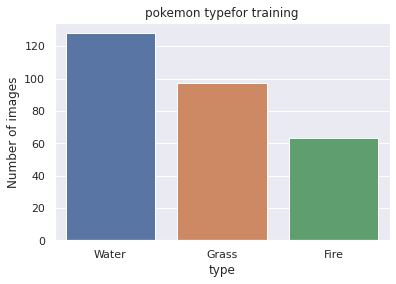

In [ ]:
df1['type'] = poke_type
df1['code'] = code
new_df = df1.drop(['Type1', 'Type2', 'Name'], axis=1)
new_df = new_df[new_df['type']!='NaN']
from sklearn.utils import shuffle
new_df = shuffle(new_df)
new_df.reset_index(drop=True, inplace=True)
new_df.head(999)
sns.countplot(x=new_df.type)
plt.title('pokemon typefor training')
plt.ylabel('Number of images')
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.1
)


train_generator = train_datagen.flow_from_dataframe(
    new_df, 
    x_col='filepath', y_col='type',
    target_size=(120, 120), 
    # target_size=(227, 227),
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=32, 
    shuffle=True, 
    seed=1,
    subset='training'
)

validation_generator = train_datagen.flow_from_dataframe(
    new_df , x_col='filepath', y_col='type',
    target_size=(120, 120),
    # target_size=(227, 227),
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=4, 
    shuffle=True,
    seed=1, 
    subset='validation'
)

Found 260 validated image filenames belonging to 3 classes.
Found 28 validated image filenames belonging to 3 classes.


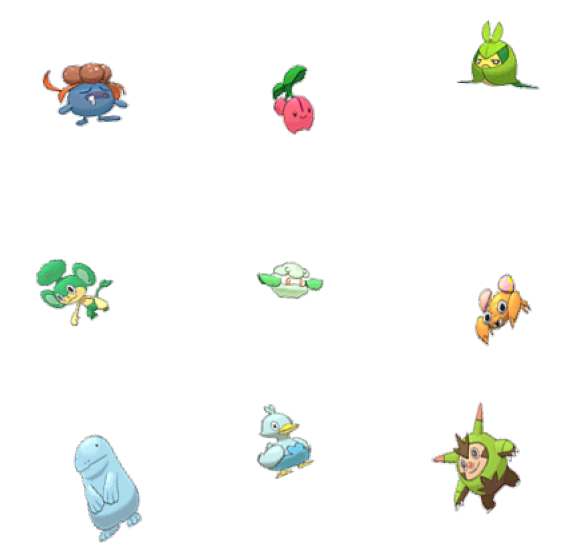

In [ ]:
image_sample = train_generator.next()[0]

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(image_sample[i, :, :, :])
    plt.axis('off')
plt.show()

In [ ]:
model = ks.models.Sequential()


model.add(ks.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(120,120,4)))
model.add(ks.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))


model.add(ks.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
model.add(ks.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))


model.add(ks.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(ks.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(ks.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(ks.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))


model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(4096, activation='relu'))
model.add(ks.layers.Dropout(0.5))
model.add(ks.layers.Dense(4096, activation='relu'))
model.add(ks.layers.Dropout(0.5))
model.add(ks.layers.Dense(3, activation='softmax'))

# from tensorflow.keras.optimizers import SGD
# from keras.optimizers import SGD
# opt = SGD(lr=0.001)
# model.compile(loss = "categorical_crossentropy", 
#               optimizer = tf.keras.optimizers.SGD(0.01), 
#               metrics=['acc'])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])







In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 28, 28, 96)        46560     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 13, 13, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 13, 13, 256)       614656    
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 6, 6, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 6, 6, 384)         885120    
                                                                 
 conv2d_73 (Conv2D)          (None, 6, 6, 384)       

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') is not None and logs.get('acc') > 0.95) and (logs.get('val_acc') is not None and logs.get('val_acc') > 0.95):
            print('\n reached accuarcy so stopping training')
            self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(
    train_generator, 
    validation_data=validation_generator,
    batch_size=20, 
    epochs=100,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(), 
        callbacks
    ]
    
)

Epoch 1/100
9/9 [==============================] - 13s 1s/step - loss: 1.3761 - acc: 0.3692 - val_loss: 1.0950 - val_acc: 0.3571 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - 12s 1s/step - loss: 1.0773 - acc: 0.4538 - val_loss: 1.1004 - val_acc: 0.3571 - lr: 0.0010
Epoch 3/100
9/9 [==============================] - 12s 1s/step - loss: 1.0615 - acc: 0.4462 - val_loss: 1.1111 - val_acc: 0.3571 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - 12s 1s/step - loss: 1.0638 - acc: 0.4038 - val_loss: 1.1151 - val_acc: 0.3571 - lr: 0.0010
Epoch 5/100
9/9 [==============================] - 12s 1s/step - loss: 1.0564 - acc: 0.4538 - val_loss: 1.1313 - val_acc: 0.3571 - lr: 0.0010
Epoch 6/100
9/9 [==============================] - 12s 1s/step - loss: 1.0553 - acc: 0.4538 - val_loss: 1.1408 - val_acc: 0.3571 - lr: 0.0010
Epoch 7/100
9/9 [==============================] - 12s 1s/step - loss: 1.0265 - acc: 0.4538 - val_loss: 1.0572 - val_acc: 0.3571 - lr: 0.0010
Epoch 

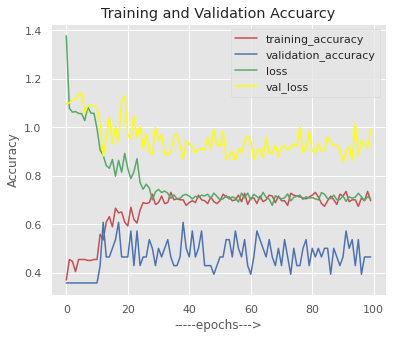

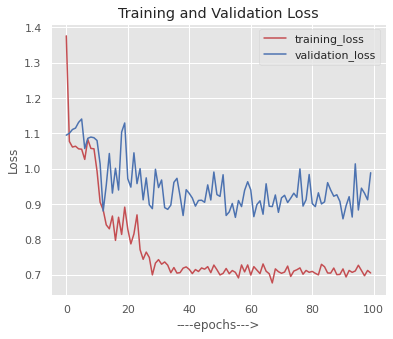

In [ ]:
plt.style.use('ggplot')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(6, 5))

plt.plot(epochs, acc, 'r', label='training_accuracy')
plt.plot(epochs, val_acc, 'b', label='validation_accuracy')
plt.plot(epochs, loss, 'g', label='loss')
plt.plot(epochs, val_loss, 'yellow', label='val_loss')
plt.title('Training and Validation Accuarcy')
plt.xlabel('-----epochs--->')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(6, 5))

plt.plot(epochs, loss, 'r', label='training_loss')
plt.plot(epochs, val_loss, 'b', label='validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('----epochs--->')
plt.ylabel('Loss')
plt.legend()

plt.show()